# 1. Dataset Overview

In [3]:
import os

from glob import glob

base_path = "garbage-dataset"
image_dir = os.path.join(base_path, "images")
label_dir = os.path.join(base_path, "labels")

image_files = glob(os.path.join(image_dir, "*.jpg"))
label_files = glob(os.path.join(label_dir, "*.txt"))

print(f"Total images: {len(image_files)}")
print(f"Total label files: {len(label_files)}")

Total images: 350
Total label files: 350


# 2. Checking Sample Annotations

In [6]:
# Display contents of one annotation file

with open(label_files[0], 'r') as f:
    print(f.read())

0 0.507960 0.494135 0.734757 0.941349


# 3. Class Distribution

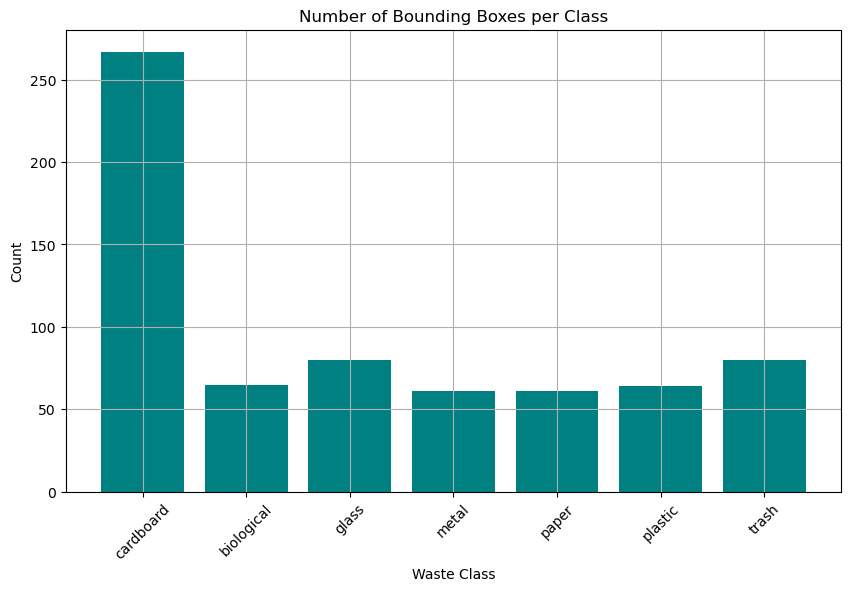

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the class names
classes = ['cardboard', 'biological', 'glass', 'metal', 'paper', 'plastic', 'trash']
class_counts = {i: 0 for i in range(len(classes))}

# Count class occurrences
for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

# Convert to DataFrame for plotting
df = pd.DataFrame({
    'Class': [classes[i] for i in class_counts],
    'Count': list(class_counts.values())
})

# Plot

plt.figure(figsize=(10, 6))
plt.bar(df['Class'], df['Count'], color='teal')
plt.title('Number of Bounding Boxes per Class')
plt.xlabel('Waste Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Visualizing Annoations

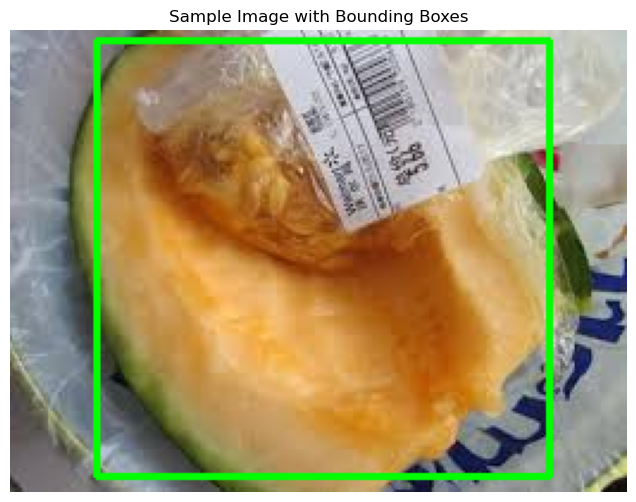

In [11]:
import cv2

# Draw YOLO Boxes

def draw_yolo_boxes(img_path, label_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, 'r') as f:
        for line in f:
            cls_id, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, classes[int(cls_id)], (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    return image


# Sample image and label

sample_img = image_files[0]
sample_label = sample_img.replace("images", "labels").replace(".jpg", ".txt")

# Draw
annotated = draw_yolo_boxes(sample_img, sample_label)
plt.figure(figsize=(8,6))
plt.imshow(annotated)
plt.axis('off')
plt.title('Sample Image with Bounding Boxes')
plt.show()

# 5. Checking for Missing Files

In [12]:
image_base = set(os.path.basename(f).replace('.jpg', '') for f in image_files)
label_base = set(os.path.basename(f).replace('.txt', '') for f in label_files)

missing_labels = image_base - label_base
missing_images = label_base - image_base

print(f"Images without labels: {len(missing_labels)}")
print(f"Labels without images: {len(missing_images)}")

Images without labels: 0
Labels without images: 0
